<a href="https://colab.research.google.com/github/nelsondressler/Airbnb_PrevisaoPrecoEstadia/blob/main/Airbnb_PrevisaoPrecoEstadia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aplicação em Data Science - Previsão de Preços de Estadia no Rio de Janeiro

<center><img alt="Foto Rio de Janeiro" width="80%" src="https://cdn.britannica.com/03/94403-050-03683FB0/Rio-de-Janeiro-Braz.jpg"></center>

Este notebook apresenta uma análise exploratória de dados e a criação de um modelo preditivo para previsão de preços de estadia no Rio de Janeiro, com base nos dados do AirBnB, disponíveis neste [link](http://insideairbnb.com/get-the-data.html).

<center><img alt="Logo da Airbnb" width="50%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

O desenvolvimento deste notebook foi baseado nos seguintes links:

- [Data Science: Analisando os Dados da Airbnb no Rio de Janeiro](https://colab.research.google.com/github/consultantleonardoferreira/Projetos-em-Data-Science/blob/master/airbnb.ipynb#scrollTo=LmMKEROuc2JI)

- [Projeto Airbnb Rio - Ferramenta de Previsão de Preço de Imóvel para pessoas comuns](https://colab.research.google.com/drive/1oopIrXAa28O_8-7p0PlYL_1X74xUjt0t?usp=sharing)

Processo de Data Science

Para o projeto desenvolvido para esta aplicação, foi utilizado um processo sistemático de data science com os seguintes passos:

1. **`Problema de Negócio`**: levantamento e entendimento de negócios, a fim de apresentar o problema a ser resolvido, além dos objetivos da análise a serem cumpridos. 

2. **`Análise Exploratíria de Dados (EDA)`**: exploração detalhada dos dados coletados, com as estatísticas das variáveis, suas distribuições, além da apresentação de possíveis valores ausentes (*missing values*) e valores externos (*outliers*).

3. **`Pré-processamento de Dados`**: preparação dos dados, consistindo nas etapas de limpeza, integração, redução e transformação dos dados brutos, a fim de permitir que seja criado o modelo de ML posteriormente.

4. **`Modelo de ML`**: criação do modelo de machine learning, propriamente dito, com as etapas de treinamento, validação (opcional) e teste.

5. **`Avaliação`**: avaliação e comparação entre diversos modelos, com base num baseline e nas métricas definidas para evidenciar qual obteve melhor desempenho e o melhor resultado.

Segue a imagem do diagrama com o processo a ser seguido:

<center><img alt="Logo da Airbnb" src="https://github.com/nelsondressler/Airbnb_PrevisaoPrecoEstadia/blob/main/ProcessoDS.png?raw=true"></center>


## 1. Problema de Negócio

**Proposta**

A proposta para o desenvolvimento deste projeto consistiu na utilização dos dados do AirBnB para a realização de uma modelagem de previsão dos preços das estadias, conforme uma medida de desempenho.

**Objetivos**

Este projeto teve como objetivos:

- a participação num processo de seleção na área de data science;

- a análise preditiva dos dados obtidos pela AirBnB;

- a colaboração aos anfitriões para que possam ter a noção de precificação de moradias, conforme os dados de entrada; e

- a colaboração aos hóspedes para que possam ter a noção de qual região ou tipo de moradia seja mais adequada, conforme o seu orçamento de viagem.

**Problema**

Com base na proposta e objetivos apresentados para este trabalho, foi possível identificar que a tarefa a ser realizada foi de aprendizado supervisionado, pois foi fornecido os dados de preços no conjunto de dados, mais especificamente uma tarefa de regressão multivariada, pois os preços possuem valores numéricos e o modelo possui mais de uma variável preditora.

**Solução**

Como solução para a problemática deste projeto, foi elaborada uma análise exploratória de dados para avaliar a consistência dos dados e identificar possíveis variáveis que impactassem na variável resposta, bem como a modelagem preditiva propriamente dita.

**Métodos**

Como métodos de desenvolvimento para este projeto, foi utilizada a linguagem Python, com as bibliotecas referentes à tarefas de data science, são elas:

- *numpy*: processamento numérico

- *pandas*: manipulação e análise de dados 

- *matplotlib*: geração de gráficos

- *seaborn*: melhoria visual em gráficos

- *sklearn*: técnicas de pré-processamento de dados e utilização de algoritmos de machine learning

**Medida de Desempenho**

Como medidas de desempenho, foram escolhidas as métricas R² (r-quadrado ou coeficiente de determinação), MSE ou RMSE (raiz do erro quadrático médio) e MAE (erro absoluto médio).

**Entendimento dos Dados**

* `id` - número de id gerado para identificar o imóvel.
* `name` - nome da propriedade anunciada.
* `host_id` - número de id do proprietário (anfitrião) da propriedade.
* `host_name` - Nome do anfitrião.
* `neighbourhood_group` - esta coluna não contém nenhum valor válido.
* `neighbourhood` - nome do bairro.
* `latitude` - coordenada da latitude da propriedade.
* `longitude` - coordenada da longitude da propriedade.
* `room_type` - informa o tipo de quarto que é oferecido.
* `price` - preço para alugar o imóvel.
* `minimum_nights` - quantidade mínima de noites para reservar.
* `number_of_reviews` - número de reviews que a propriedade possui.
* `last_review` - data do último review.
* `reviews_per_month` - quantidade de reviews por mês.
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião.
* `availability_365` - número de dias de disponibilidade dentro de 365 dias.

## 2. Análise Exploratória de Dados

#### Importação das Bibliotecas

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 18
sns.set_context('talk', font_scale=1.2)
%matplotlib inline

from sklearn.preprocessing import StandardScaler #biblioteca de normalização de dados

from sklearn.model_selection import KFold, cross_val_score, StratifiedShuffleSplit #bibliotecas de construção de validação cruzada

from sklearn.linear_model import LinearRegression #biblioteca de construção do algoritmos Regressão Logística
from sklearn.tree import DecisionTreeRegressor #biblioteca de construção do algoritmo Árvore de Classificação
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor #biblioteca de construção do algoritmo Floresta Randômica/Aleatória
from sklearn.svm import SVR #biblioteca de construção do algoritmo SVM

from sklearn.model_selection import train_test_split #biblioteca de separação do dataset em Treino e Teste

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_squared_log_error

#### Leitura do Dataset

In [ ]:
listings_df = pd.read_csv("http://data.insideairbnb.com/brazil/rj/rio-de-janeiro/2020-04-20/visualisations/listings.csv")

In [ ]:
listings_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,17878,Very Nice 2Br - Copacabana - WiFi,68997,Matthias,NaN,Copacabana,-22.96592,-43.17896,Entire home/apt,218,5,251,2020-04-06,2.11,1,0
1,21280,Renovated Modern Apt. Near Beach,81163,Jules,NaN,Ipanema,-22.98467,-43.19611,Entire home/apt,422,5,94,2020-03-22,1.25,1,69
2,25026,Beautiful Modern Decorated Studio in Copa,102840,Viviane,NaN,Copacabana,-22.97712,-43.19045,Entire home/apt,158,7,238,2020-02-15,1.98,3,95
3,31560,NICE & COZY 1BDR - IPANEMA BEACH,135635,Renata,NaN,Ipanema,-22.98302,-43.21427,Entire home/apt,342,2,282,2020-03-02,2.37,1,0
4,35636,Cosy flat close to Ipanema beach,153232,Patricia,NaN,Ipanema,-22.98816,-43.19359,Entire home/apt,479,2,181,2020-03-15,2.29,1,358


#### Informações do Dataset

In [ ]:
# Dimensões (linhas x colunas)
listings_df.shape

(35870, 16)

In [ ]:
# Descrição das colunas (nome, tipo, quantidade de não nulos)
listings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35870 entries, 0 to 35869
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              35870 non-null  int64  
 1   name                            35812 non-null  object 
 2   host_id                         35870 non-null  int64  
 3   host_name                       35865 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   35870 non-null  object 
 6   latitude                        35870 non-null  float64
 7   longitude                       35870 non-null  float64
 8   room_type                       35870 non-null  object 
 9   price                           35870 non-null  int64  
 10  minimum_nights                  35870 non-null  int64  
 11  number_of_reviews               35870 non-null  int64  
 12  last_review                     

É possível perceber que existe uma quantidade de campos com valores ausentes, consistindo em 'neighbourhood_group' com 100%, 'name' com 1% e 'last_review' e 'review_per_month' com 66% de presença de valores nulos.

In [ ]:
# Valores ausentes
listings_df.isnull().sum()

id                                    0
name                                 58
host_id                               0
host_name                             5
neighbourhood_group               35870
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       14766
reviews_per_month                 14766
calculated_host_listings_count        0
availability_365                      0
dtype: int64

#### Análise Descritiva dos Campos Numéricos

In [ ]:
# seleção dos campos numéricos
listings_df_numerics = listings_df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']]

In [ ]:
listings_df_numerics.describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,35870.000000,35870.000000,35870.000000,21104.000000,35870.000000,35870.000000
mean,753.686367,4.781851,9.822972,0.652248,6.613995,180.371815
std,2229.366334,22.471085,25.827647,0.823388,22.769663,152.510778
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,158.000000,1.000000,0.000000,0.130000,1.000000,0.000000
50%,298.000000,2.000000,1.000000,0.340000,1.000000,178.000000
75%,632.000000,4.000000,6.000000,0.830000,3.000000,363.000000
max,131727.000000,1123.000000,399.000000,9.570000,200.000000,365.000000


É possível perceber que, em geral, existe uma divergência acentuada entre os valores de média e mediana das variáveis.

#### Correlações das Variáveis

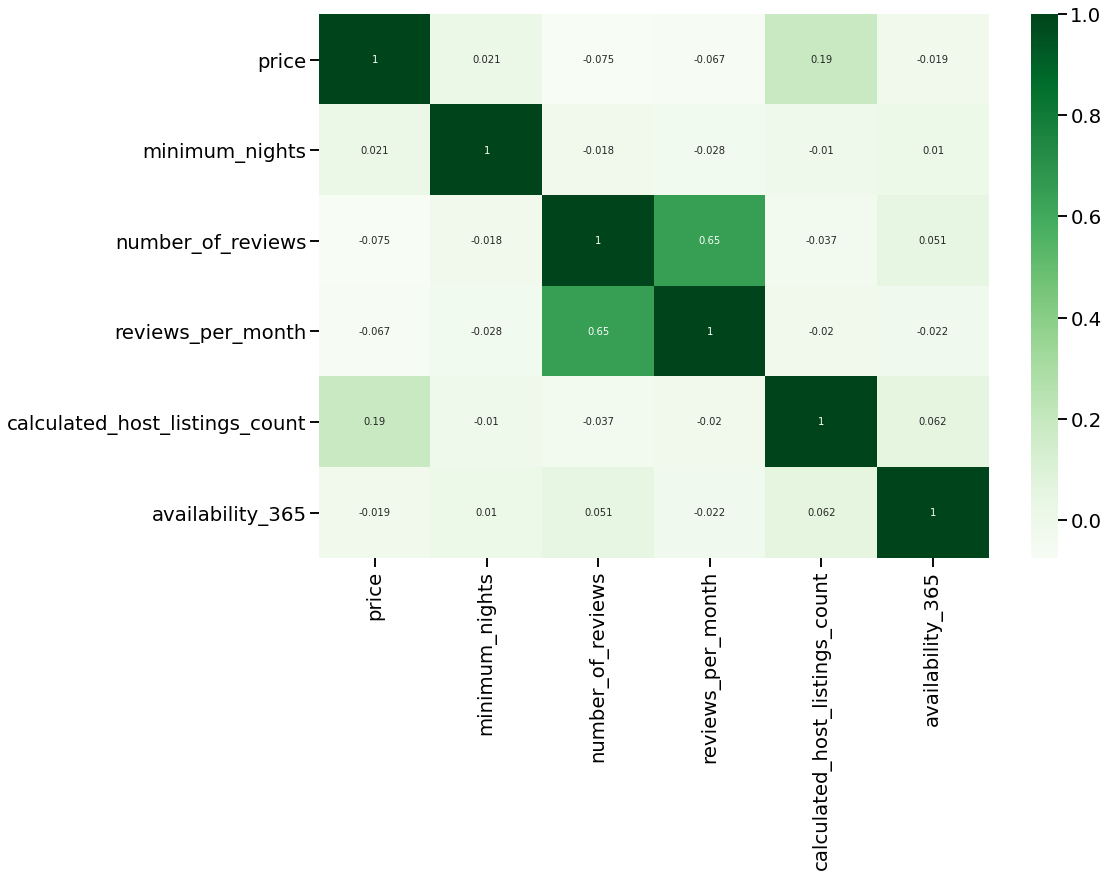

In [ ]:
plt.figure(figsize=(15, 10))
sns.heatmap(listings_df_numerics.corr(), annot=True, cmap='Greens')

É possível perceber que as variáveis 'number_of_reviews' e 'reviews_per_month' possuem uma correlação positiva razoavelmente alta: 65%.

Visualização de Dados (gráficos)

In [ ]:
# Funções úteis para a criação dos gráficos
def limites(coluna):
    q1 = coluna.quantile(0.25)
    q3 = coluna.quantile(0.75)
    amplitude = q3 - q1
    return q1 - 1.5 * amplitude, q3 + 1.5 * amplitude

def diagrama_caixa(coluna):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(15, 5)
    sns.boxplot(x=coluna, ax=ax1)
    ax2.set_xlim(limites(coluna))
    sns.boxplot(x=coluna, ax=ax2)

def histograma(coluna):
    plt.figure(figsize=(15, 5))
    sns.distplot(coluna, hist=True)

##### Distribuição das Variáveis Numéricas

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

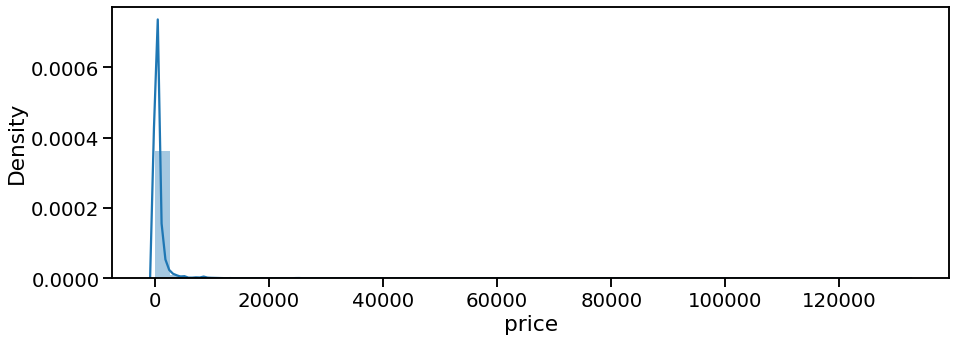

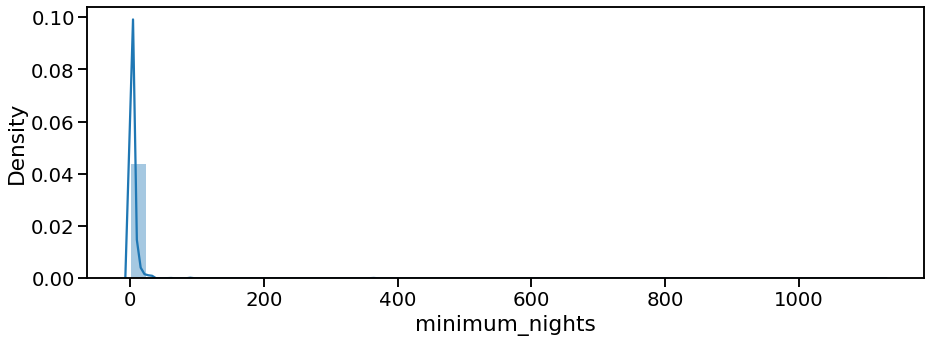

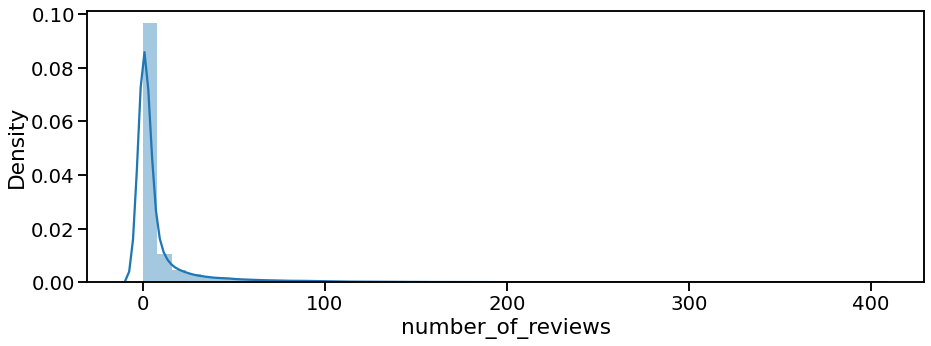

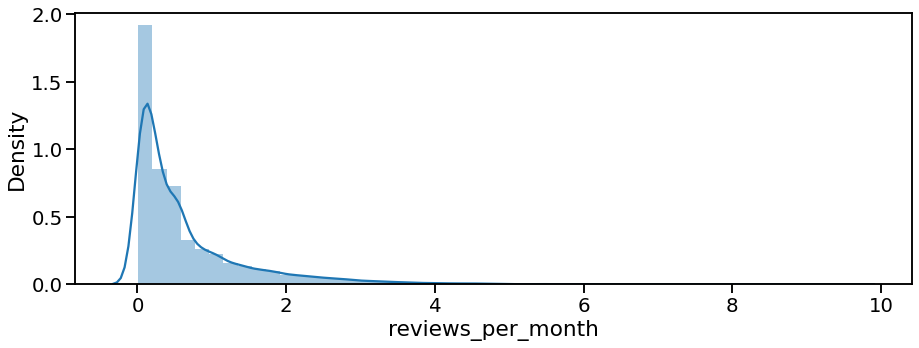

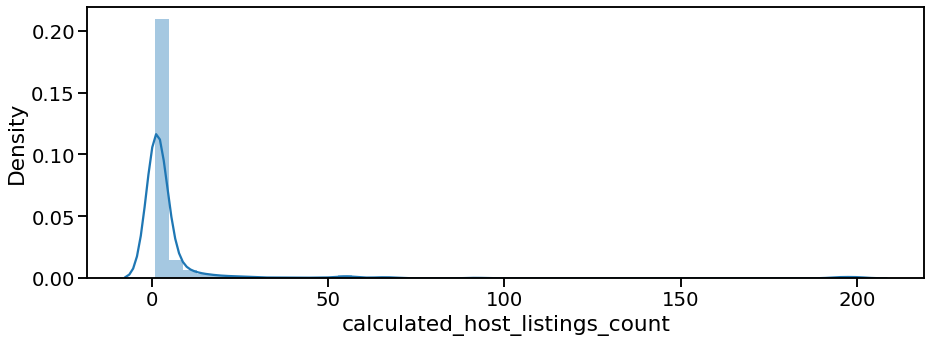

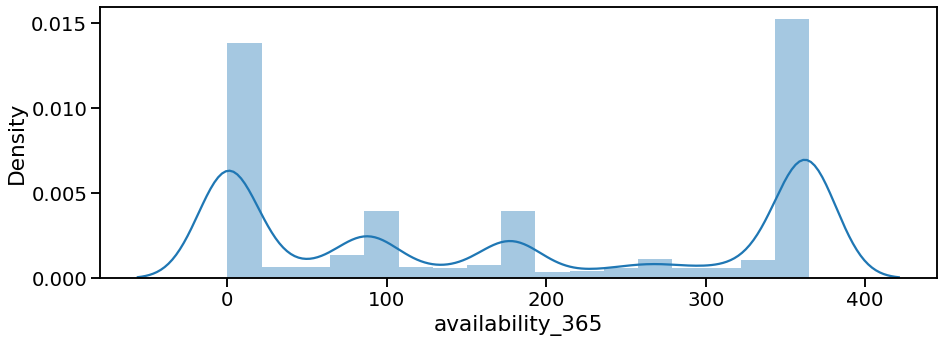

In [ ]:
for column in listings_df_numerics.columns:
    histograma(listings_df[column])

É possível perceber que a distribuição geral das variáveis possui uma assimetria à direita

##### Análise de Valores Externos (outliers)

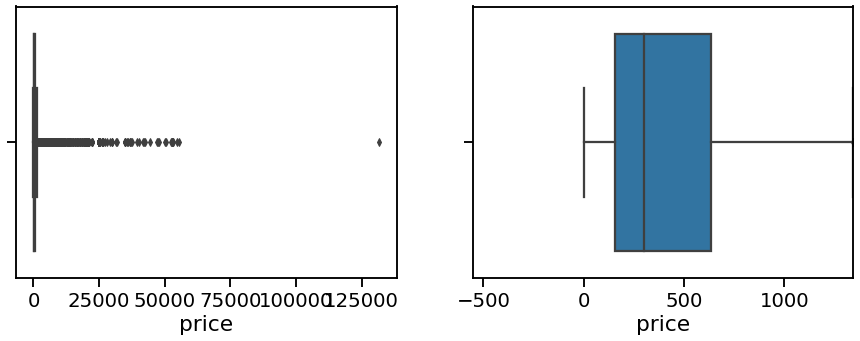

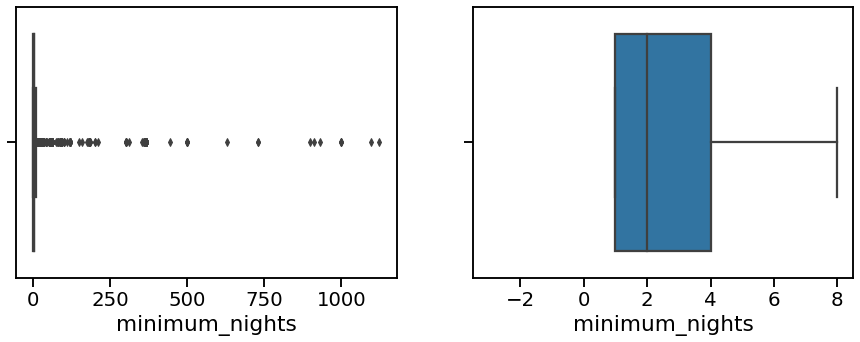

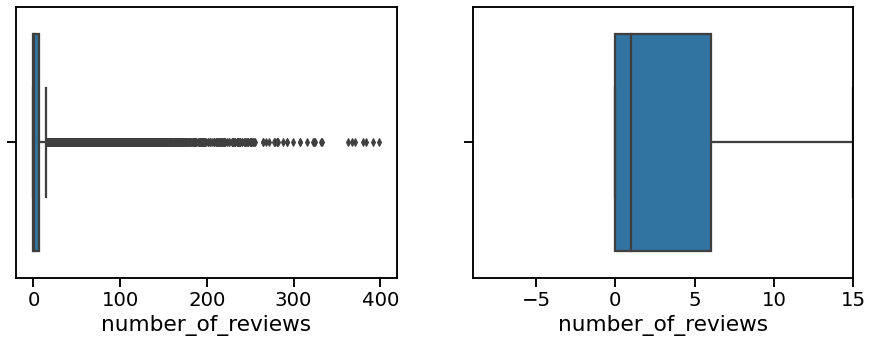

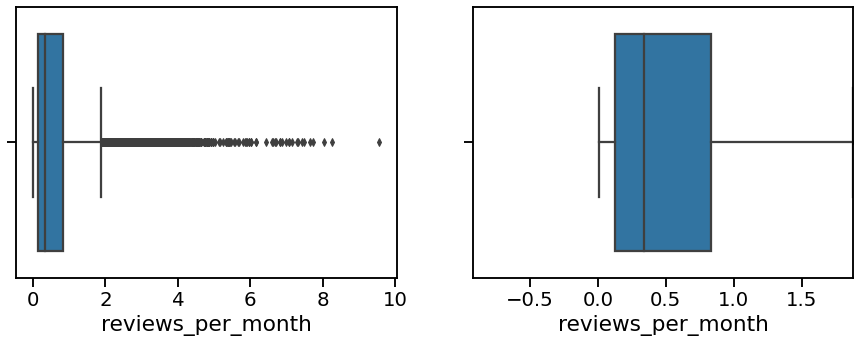

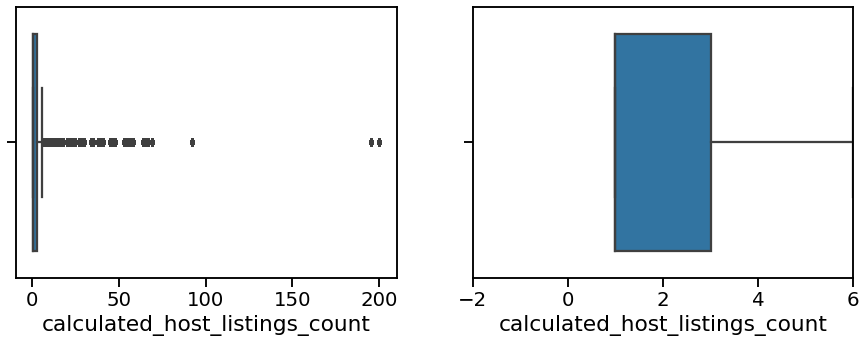

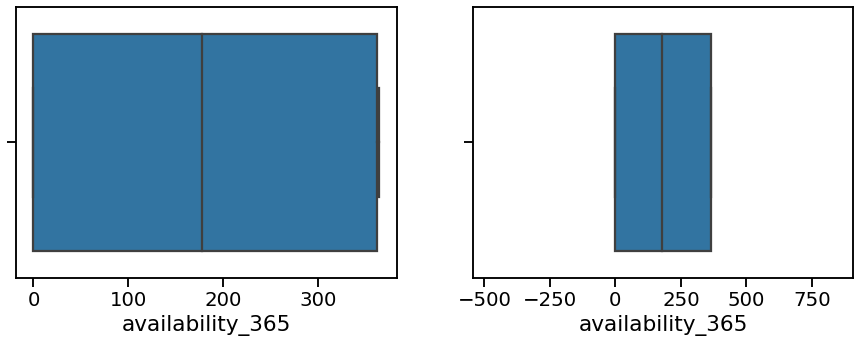

In [ ]:
for column in listings_df_numerics.columns:
    diagrama_caixa(listings_df[column])

É possível perceber que existem muitos campos com valores externos.

##### Análise das Variáveis Categóricas

In [ ]:
# Bairros do Rio de Janeiro cadastrados
listings_df['neighbourhood'].unique()

array(['Copacabana', 'Ipanema', 'Barra da Tijuca', 'Flamengo', 'Leblon',
       'Santa Teresa', 'Centro', 'Gávea', 'Campo Grande', 'Laranjeiras',
       'Humaitá', 'Botafogo', 'Santo Cristo', 'Glória', 'São Conrado',
       'Itanhangá', 'São Cristóvão', 'Lagoa', 'Praça Seca', 'Maracanã',
       'Tijuca', 'São Francisco Xavier', 'Catete', 'Jacarepaguá',
       'Vidigal', 'Marechal Hermes', 'Jardim Botânico', 'Rio Comprido',
       'Recreio dos Bandeirantes', 'Senador Camará', 'Irajá',
       'Vargem Grande', 'Leme', 'Vila da Penha', 'Anil', 'Vargem Pequena',
       'Estácio', 'Grajaú', 'Cosme Velho', 'Gardênia Azul', 'Taquara',
       'Bangu', 'Urca', 'Joá', 'Alto da Boa Vista', 'Penha Circular',
       'Jardim Sulacap', 'Praça da Bandeira', 'Encantado',
       'Lins de Vasconcelos', 'Cosmos', 'Santíssimo', 'Gamboa',
       'Bonsucesso', 'Camorim', 'Piedade', 'Olaria', 'Vila Valqueire',
       'Cidade de Deus', 'Riachuelo', 'Barra de Guaratiba',
       'Padre Miguel', 'Méier', 'Andaraí'

In [ ]:
# Frequência absoluta dos bairros
listings_df['neighbourhood'].value_counts()

Copacabana         9422
Barra da Tijuca    3976
Ipanema            3068
Jacarepaguá        2035
Botafogo           1753
                   ... 
Parque Colúmbia       1
Jardim América        1
Maré                  1
Caju                  1
Cavalcanti            1
Name: neighbourhood, Length: 155, dtype: int64

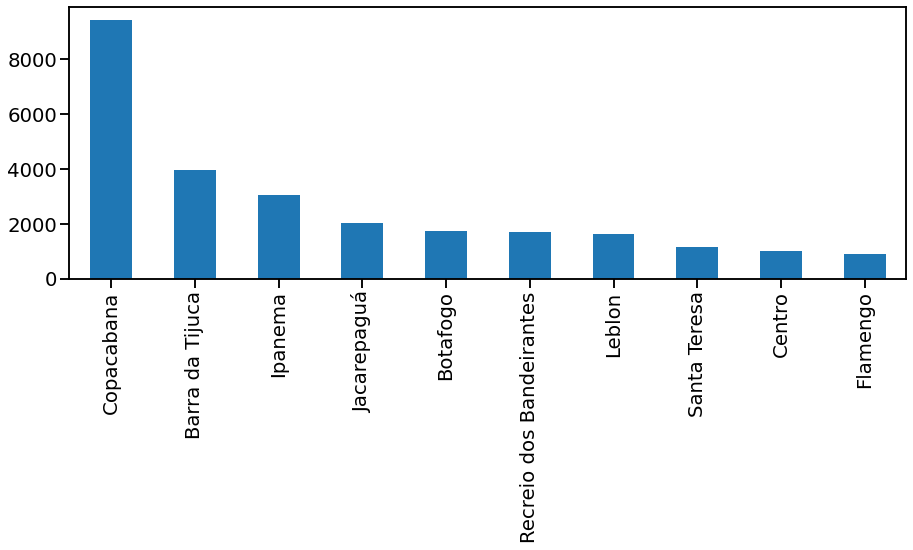

In [ ]:
plt.figure(figsize=(15, 5))
listings_df['neighbourhood'].value_counts()[:10].plot.bar()

In [ ]:
# Tipos de moradia cadastrados
listings_df['room_type'].unique()

array(['Entire home/apt', 'Private room', 'Shared room', 'Hotel room'],
      dtype=object)

In [ ]:
# Frequência absoluta dos tipos de moradia
listings_df['room_type'].value_counts()

Entire home/apt    25711
Private room        9194
Shared room          786
Hotel room           179
Name: room_type, dtype: int64

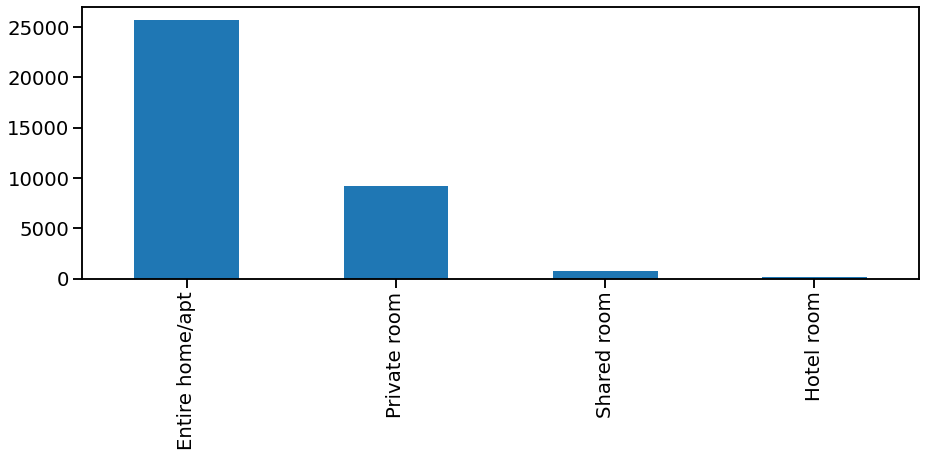

In [ ]:
plt.figure(figsize=(15, 5))
listings_df['room_type'].value_counts().plot.bar()

## 3. Pré-processamento de Dados

#### Seleção de Características

In [ ]:
listings_df_selected = listings_df[
    ['latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'last_review', 'calculated_host_listings_count', 'availability_365']
]

In [ ]:
listings_df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

Colunas descartadas:

- 'id', 'name', 'host_id' e 'host_name': não possuem influência direta na atribuição dos preços;

- 'neighbourhood_group': campo com 100% dos valores ausentes;

- 'neighbourhood': campo com informação redundante, já que pode ser representado pelos dados de geolocalização (latitude + longitude);

- 'reviews_per_month': campo possui uma correlação alta com 'number_of_reviews' (65%), sendo que, deste modo, pode haver alterações de criação do modelo de regressão para mapear a variável resposta.

#### Engenharia de Características (limpeza, integração, redução e transformação)

In [ ]:
listings_df_transformed = listings_df_selected.copy()

##### Exclusão de Outliers

In [ ]:
# função auxiliar para exclusão de outliers
def excluir_outliers(df, nome_coluna):
    qtde_linhas = df.shape[0]
    lim_inf, lim_sup = limites(df[nome_coluna])
    df = df.loc[(df[nome_coluna] >= lim_inf) & (df[nome_coluna] <= lim_sup), :]
    linhas_removidas = qtde_linhas - df.shape[0]
    return df,  linhas_removidas

In [ ]:
numerics = ['price', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365']
for column in numerics:
    listings_df_transformed, linhas_removidas = excluir_outliers(listings_df_transformed, column)
    print(f'Coluna {column}: {linhas_removidas} linhas removidas')

Coluna price: 3736 linhas removidas
Coluna minimum_nights: 2010 linhas removidas
Coluna number_of_reviews: 4153 linhas removidas
Coluna calculated_host_listings_count: 3259 linhas removidas
Coluna availability_365: 0 linhas removidas


##### Preenchimento e Conversão de Campos do Tipo Data em Timestamp

In [ ]:
listings_df_transformed['last_review'] = pd.to_datetime(listings_df_transformed['last_review']) # conversão para datetime
listings_df_transformed['last_review'] = listings_df_transformed['last_review'].fillna(listings_df_transformed['last_review'].min()) # preenchimento com os mínimos
listings_df_transformed['last_review'] = listings_df_transformed[['last_review']].apply(lambda x: x[0].timestamp(), axis=1).astype(int) # conversão para timestamp

##### Conversão das Variáveis Categóricas em Dummy (pivoteamento dos valores únicos)

In [ ]:
categories = ['room_type']
listings_df_transformed = pd.get_dummies(data=listings_df_transformed, columns=categories)

In [ ]:
listings_df_transformed.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,calculated_host_listings_count,availability_365,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
8,-22.96574,-43.17514,548,4,4,1583625600,1,356,1,0,0,0
13,-22.92972,-43.17488,1033,7,8,1405555200,2,206,1,0,0,0
16,-22.92873,-43.17473,258,4,1,1471996800,2,294,1,0,0,0
20,-22.98449,-43.23068,290,3,13,1470960000,1,363,0,0,1,0
21,-22.98467,-43.19753,448,3,14,1578182400,1,269,1,0,0,0


##### Exclusão de Redundância Gerada no Pivoteamento

In [ ]:
exclude = ['room_type_Shared room']
listings_df_transformed = listings_df_transformed.drop(exclude, axis=1)

In [ ]:
listings_df_transformed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22712 entries, 8 to 35869
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   latitude                        22712 non-null  float64
 1   longitude                       22712 non-null  float64
 2   price                           22712 non-null  int64  
 3   minimum_nights                  22712 non-null  int64  
 4   number_of_reviews               22712 non-null  int64  
 5   last_review                     22712 non-null  int64  
 6   calculated_host_listings_count  22712 non-null  int64  
 7   availability_365                22712 non-null  int64  
 8   room_type_Entire home/apt       22712 non-null  uint8  
 9   room_type_Hotel room            22712 non-null  uint8  
 10  room_type_Private room          22712 non-null  uint8  
dtypes: float64(2), int64(6), uint8(3)
memory usage: 1.6 MB


##### Correlação das Variáveis com a Resposta

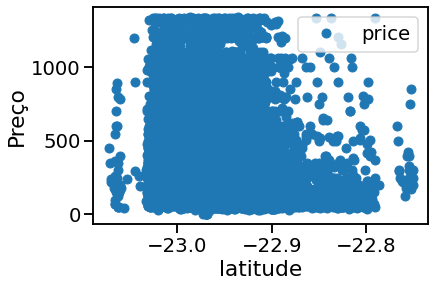

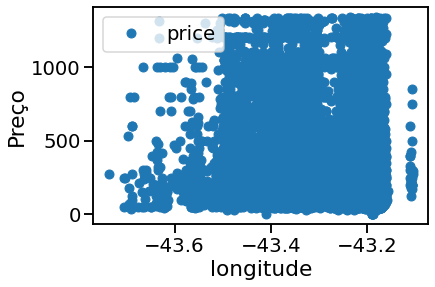

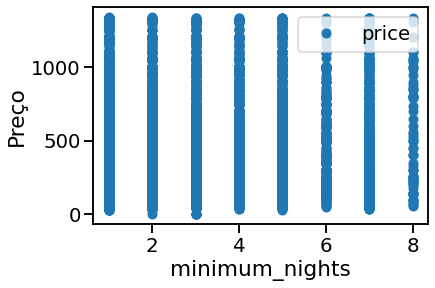

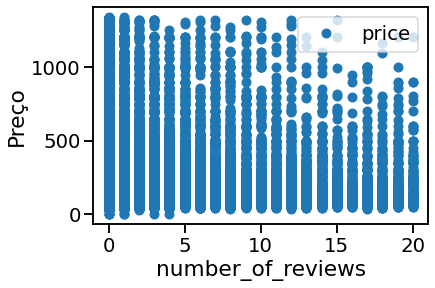

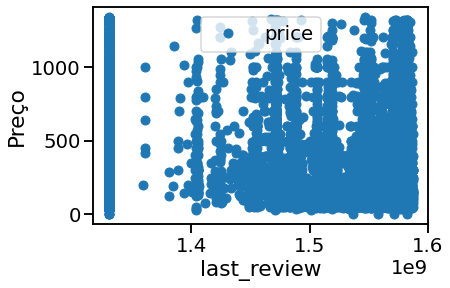

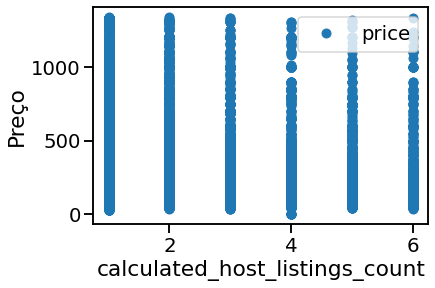

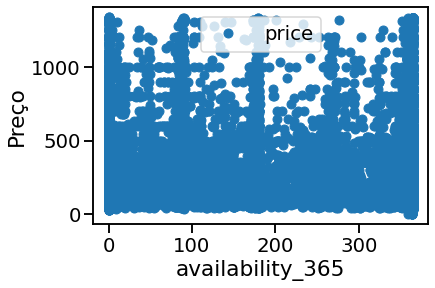

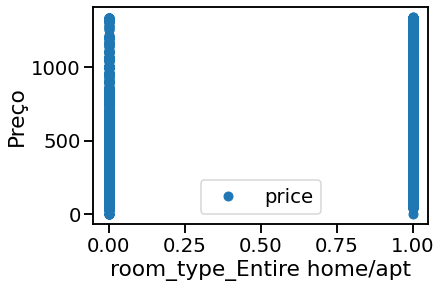

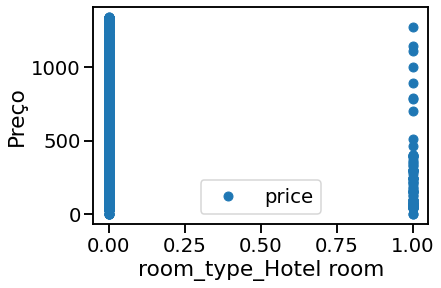

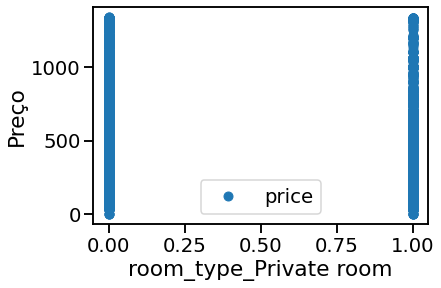

In [ ]:
#plotando gráficos de correlação das features
for i in listings_df_transformed.columns:
    if(i != 'price'):
        listings_df_transformed.plot(x=i, y='price', style='o') 
        plt.xlabel(i)
        plt.ylabel('Preço')

## 4. Modelo de ML

#### Separação dos Dados em Treino e Teste

##### Separação Aleatória dos Dados

In [ ]:
# Definindo as entradas (x) e as saídas (y)
# X = np.array(listings_df_transformed.drop('price', axis=1))
# y = np.array(listings_df_transformed['price'])

In [ ]:
# Dividindo os dados entre treinamento e teste (20% para teste)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42) # divide 20% para teste

Após teste realizado com normalização aleatória, foi possível perceber uma eficácia menor na execução das técnicas de aprendizado de máquina posteriores.

##### Separação dos Dados por Estratos (tipos de moradia)

In [ ]:
# Recuperação dos tipos de moradia, apenas para separar os dados
listings_df_transformed['room_type'] = listings_df_selected['room_type']

# mapeamento das classes
name_to_class = {
    'Entire home/apt': 0,
    'Private room': 1,
    'Shared room': 2,
    'Hotel room': 3
}

#substituindo os valores categóricos pelo mapeamento
listings_df_transformed['room_type'] = listings_df_transformed['room_type'].map(name_to_class)

In [ ]:
listings_df_transformed['room_type'].value_counts()

0    14761
1     7311
2      561
3       79
Name: room_type, dtype: int64

In [ ]:
# Dividindo os dados entre treinamento e teste (20% para teste), com estratificação
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

In [ ]:
# Gerando os dados de treino e teste
for train_index, test_index in split.split(listings_df_transformed, listings_df_transformed['room_type']):
    strat_train_set = listings_df_transformed[listings_df_transformed.index.isin(train_index)]
    strat_test_set = listings_df_transformed[listings_df_transformed.index.isin(test_index)]

In [ ]:
# Dividindo os dados entre treinamento e teste, com X (preditores) e y (rótulos)
X_train = np.array(strat_train_set.drop(['room_type', 'price'], axis=1))
X_test = np.array(strat_test_set.drop(['room_type', 'price'], axis=1))
y_train = np.array(strat_train_set['price'])
y_test = np.array(strat_test_set['price'])

#### Normalização de Dados

In [ ]:
# Aplicando o processo de normalização dos dados novamente
# scaler = StandardScaler()
# scaler.fit(X_train)

# X_train = scaler.transform(X_train)
# X_test = scaler.transform(X_test)

Após teste realizado com normalização, foi possível perceber uma eficácia menor na execução das técnicas de aprendizado de máquina posteriores.

#### Validação Cruzada

In [ ]:
# Construindo o objeto de validação cruzada com divisão em 10 diferentes grupos
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

In [ ]:
# Construindo os modelos de regressão
models = [
    LinearRegression(),
    DecisionTreeRegressor(random_state=42),
    RandomForestRegressor(random_state=42),
    ExtraTreesRegressor(random_state=42),
    SVR()
]

In [ ]:
# Obtendo os valores de média de r2, MSE negativo e MAE negativo, obtida nos 10 grupos para cada modelo
mean_r2 = []
mean_nmse = []
mean_nmae = []

for model in models:
    result_r2 = cross_val_score(model, X_train, y_train, cv=kfold, scoring="r2", n_jobs=-1)
    mean_r2.append(result_r2)
    
    result_nmse = cross_val_score(model, X_train, y_train, cv=kfold, scoring="neg_mean_squared_error", n_jobs=-1)
    mean_nmse.append(result_nmse)

    result_nmae = cross_val_score(model, X_train, y_train, cv=kfold, scoring="neg_mean_absolute_error", n_jobs=-1)
    mean_nmae.append(result_nmae)

#### Comparativo de Algoritmos de Regressão

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

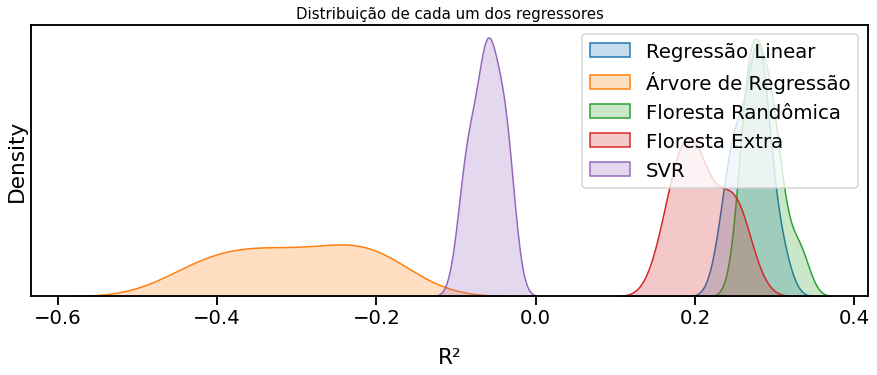

In [ ]:
# Apresentando o resultado do R² dos modelos conforme as médias obtidas
classificadores = ['Regressão Linear', 'Árvore de Regressão', 'Floresta Randômica', 'Floresta Extra', 'SVR']

plt.figure(figsize=(15, 5))
for i in range(len(mean_r2)):
    sns.distplot(mean_r2[i], hist=False, kde_kws={"shade": True})

plt.title("Distribuição de cada um dos regressores", fontsize=15)
plt.legend(classificadores)
plt.xlabel("R²", labelpad=20)
plt.yticks([])

plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

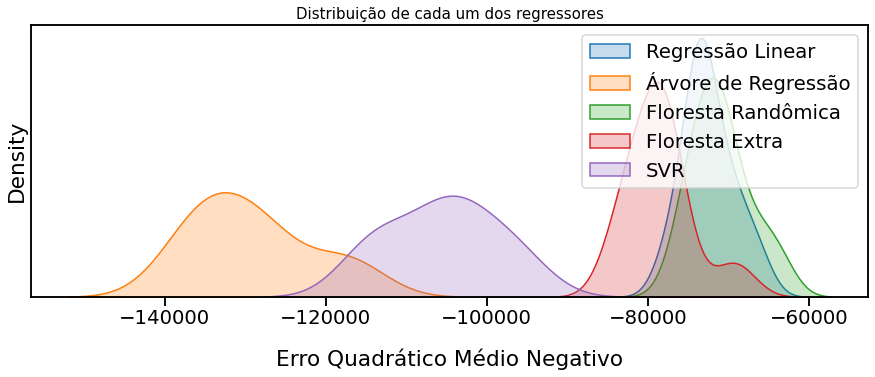

In [ ]:
# Apresentando o resultado do erro quadrático médio negativo dos modelos conforme as médias obtidas
classificadores = ['Regressão Linear', 'Árvore de Regressão', 'Floresta Randômica', 'Floresta Extra', 'SVR']

plt.figure(figsize=(15, 5))
for i in range(len(mean_nmse)):
    sns.distplot(mean_nmse[i], hist=False, kde_kws={"shade": True})

plt.title("Distribuição de cada um dos regressores", fontsize=15)
plt.legend(classificadores)
plt.xlabel("Erro Quadrático Médio Negativo", labelpad=20)
plt.yticks([])

plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

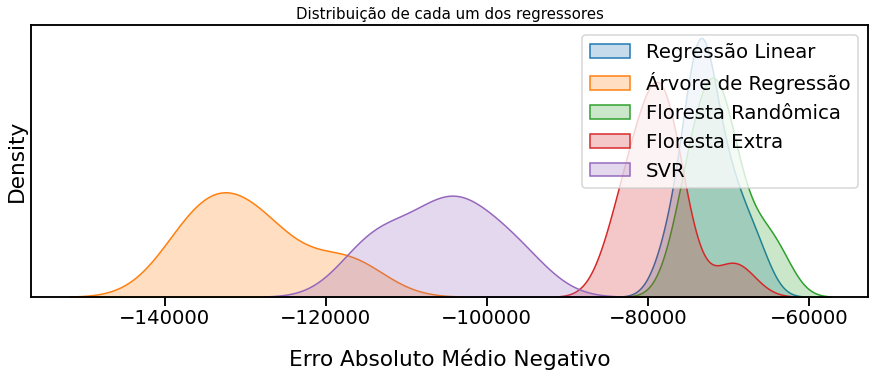

In [ ]:
# Apresentando o resultado do erro absoluto médio negativo dos modelos conforme as médias obtidas
classificadores = ['Regressão Linear', 'Árvore de Regressão', 'Floresta Randômica', 'Floresta Extra', 'SVR']

plt.figure(figsize=(15, 5))
for i in range(len(mean_nmae)):
    sns.distplot(mean_nmse[i], hist=False, kde_kws={"shade": True})

plt.title("Distribuição de cada um dos regressores", fontsize=15)
plt.legend(classificadores)
plt.xlabel("Erro Absoluto Médio Negativo", labelpad=20)
plt.yticks([])

plt.show()

Após apresentação dos resultados da validação cruzada, é possível perceber que os algoritmos de floresta randômica e regressão linear se apresentaram com melhor desempenho, em todas as métricas de avaliação.

#### Treinamento da Floresta Randômica

In [ ]:
rf_clf = RandomForestRegressor(n_jobs=-1, random_state=42)
rf_clf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

#### Treinamento da Regressão Linear

In [ ]:
lr_clf = LinearRegression()
lr_clf.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Predições dos Algoritmos

In [ ]:
y_pred_rf = rf_clf.predict(X_test)
y_pred_lr = lr_clf.predict(X_test)

## 5. Avaliação

#### Métricas de Desempenho

In [ ]:
# função auxiliar para apresentação das métricas
def avaliar_modelo(model_name, y_test, y_pred):
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    
    results = f'Modelo {model_name}'
    results += f'\nR2: {r2:.2f}'
    results += f'\nMSE:{mse:.2f}'
    results += f'\nRMSE:{rmse:.2f}'
    results += f'\nMAE:{mae:.2f}'

    return results

#### Baseline

In [ ]:
# criando baseline
y_baseline = np.full(len(y_test), listings_df_transformed['price'].mean())

In [ ]:
print(avaliar_modelo('Baseline', y_test, y_baseline))

Modelo Baseline
R2: -0.01
MSE:94218.29
RMSE:306.95
MAE:239.64


#### Resultados Floresta Randômica

In [ ]:
print(avaliar_modelo('Floresta Randômica', y_test, y_pred_rf))

Modelo Floresta Randômica
R2: 0.29
MSE:66139.27
RMSE:257.18
MAE:194.95


#### Resultados Regressão Linear

In [ ]:
print(avaliar_modelo('Regressão Linear', y_test, y_pred_lr))

Modelo Regressão Linear
R2: 0.28
MSE:67618.21
RMSE:260.04
MAE:204.19


#### Resultados Floresta Randômica (dados de treinamento)

In [ ]:
y_pred_rf = rf_clf.predict(X_train)

print(avaliar_modelo('Floresta Randômica', y_train, y_pred_rf))

Modelo Floresta Randômica
R2: 0.90
MSE:9885.90
RMSE:99.43
MAE:74.38


Com base nos resultados obtidos, é possível observar que o algoritmo que obteve maior eficácia nas etapas de validação e treinamento, obteve um desempenho bem menor nos dados de testes, ainda que melhor do que os demais, configurando como um problema de overfiting. Mesmo com os ajustes de hiperparâmetros, estratíficação e não normalização das variáveis preditoras, não foi possível atingir um resultado melhor. No entanto, o resultado obtido pelo Random Forest se faz mais eficaz do que o baseline utilizado para a execução da etapa de avaliação.